# TASK 1- Data Science And Business Analytics Internship

**By Rohit Rajbhar intern at The Sparks Foundation**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [9]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In [10]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [28]:
def null_detection(df):
    num_cols = []
    
    count = 0
    t=[]
    for i in num_cols:
        z=np.abs(stats.zscore(df[i]))
        for j in range (len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+1
                
    df=df.drop(list(set(t)))
    df=df.reset_index()
    df=df.drop('index',axis=1)
    print(count)
    return df

In [29]:
df=null_detection(df)

0


# Distribution

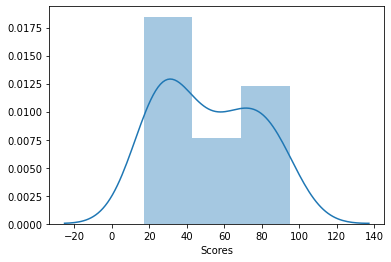

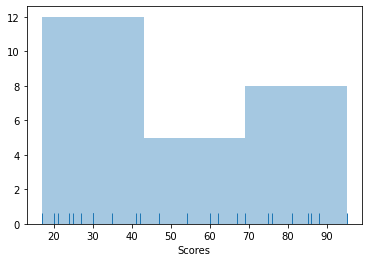

In [31]:
sns.distplot(df['Scores'])
plt.show()

sns.distplot(df['Scores'],kde=False,rug=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


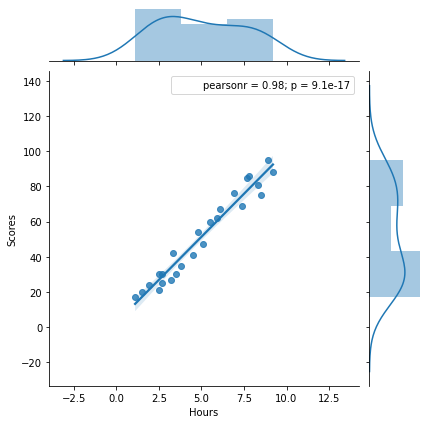

In [32]:
sns.jointplot(df['Hours'],df['Scores'],kind='reg').annotate(stats.pearsonr)
plt.show()

# Performing simple Linear Regression

 **Calculating the Coefficients of the simple linear regression euation: y=B0+B1,x(B1:Slope B0:Intercept)**

In [33]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [34]:
B1

9.775803390787475

In [35]:
B0 = mean_y - B1*mean_x

In [36]:
B0

2.4836734053731746

# Making Predictions

In [37]:
df['predicted_Scores'] = B0 + B1*df['Hours']

In [38]:
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

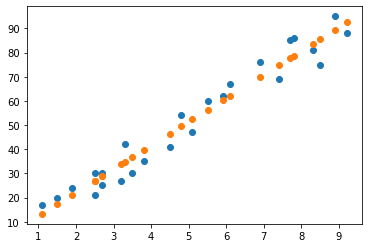

In [39]:
plt.scatter(df['Hours'], df['Scores'])
plt.scatter(df['Hours'], df['predicted_Scores'])
plt.plot()

# Prediction of given value: 9.25

In [40]:
B0 + B1*9.25

92.90985477015732

In [41]:
y = list(df['Scores'].values)
y_pred = list(df['predicted_Scores'].values)

# Root Mean Square Error

In [42]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(df))])
rmse = (np.sqrt(s/len(df)))/mean_y
rmse

0.10439521325937494

# Ordinary Least Squares Model 

In [43]:
model = smf.ols('Scores ~ Hours', data = df)
model = model.fit()

In [44]:
df['pred_ols'] = model.predict(df['Hours'])

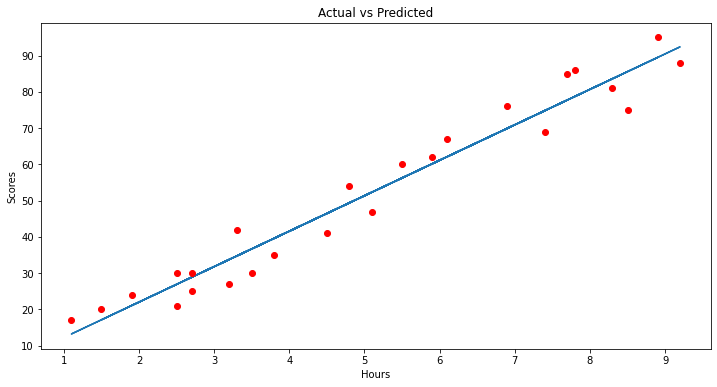

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df['Hours'], df['pred_ols'])       # regression line
plt.plot(df['Hours'], df['Scores'], 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

# We can observe that the predicted value for 9.25 hours is around 92
 

# Additional conclusions: # Categorical Prediction

In [46]:
# Consider a threshold to come to a conclusion whether the student passed or not!
# Let's consider here 40 as the cut-off to pass.

cut_off = 40

In [47]:
df['Passed?'] = df['Scores']>=40

In [48]:

df.head()

,Hours,Scores,predicted_Scores,pred_ols,Passed?
0,2.5,21,26.923182,26.923182,False
1,5.1,47,52.340271,52.340271,True
2,3.2,27,33.766244,33.766244,False
3,8.5,75,85.578002,85.578002,True
4,3.5,30,36.698985,36.698985,False


# Plotting the given data's Results 

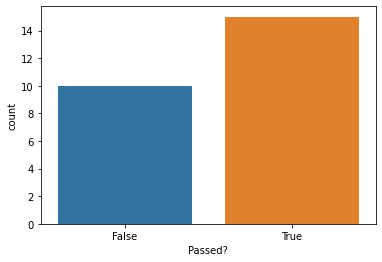

In [49]:
sns.countplot(df['Passed?'])

# Feature Engineering

In [50]:
feature = df['Hours'].values.reshape(-1, 1)
target = df['Passed?'].values

#   Splitting the Data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=0)

# Training the KNN Model

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Accuracy¶

In [53]:
knn.score(X_train, y_train)

0.9444444444444444

In [54]:
knn.score(X_test, y_test)

0.8571428571428571

# Predicting the outcomes 

In [55]:
get_results = [[9.25]]

In [56]:
knn.predict(get_results)

array([ True])

In [57]:
knn.predict([[14]])

array([ True])

In [58]:
knn.predict([[3]])

array([False])